## Why Logistic Regression?

Before we move on from single neuron models, it's important to discuss an activation function that bridges regression with binary classification: **logistic regression**.

### Logistic Regression Overview

Logistic regression employs a sigmoid activation function, mapping any input value to a range between 0 and 1. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the input to the sigmoid function, typically a linear combination of input features:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

Here, $\mathbf{w}$ denotes the weight vector, $\mathbf{x}$ the input feature vector, and $b$ the bias. The output of the sigmoid function, $\sigma(z)$, represents the probability of the positive class.

### Training Logistic Regression

To train the logistic regression model, the cross-entropy loss function is used, defined as:

$$
\text{L}(\mathbf{w}, b) = -\frac{1}{n} \sum_{i=1}^n [y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i)]
$$

where $n$ is the number of training examples, $y_i$ is the true label of the $i$-th example, and $\hat{p}_i$ is the predicted probability of the positive class for the $i$-th example.

#### Gradient Descent Updates

The gradients of the loss function with respect to the weights and bias are crucial for updating the parameters during training. They are computed as follows:

$$
\frac{\partial \text{L}}{\partial \mathbf{w}} = \frac{1}{n} \sum_{i=1}^n (\sigma(z_i) - y_i) \mathbf{x}_i
$$

$$
\frac{\partial \text{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\sigma(z_i) - y_i)
$$

Training involves minimizing the loss function using an optimization algorithm like gradient descent:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w} \text{L}, \quad b \leftarrow b - \alpha \nabla_b \text{L}
$$

where $\alpha$ is the learning rate. The parameters are updated iteratively until the loss function converges to a minimum.

### Significance of Logistic Regression

Unlike models that output discrete labels, logistic regression provides a probabilistic output, making it superior for cases where data is not linearly separable. This approach leverages the same underlying architecture as other single neuron models but utilizes the sigmoid function for a nuanced prediction capability, demonstrating robustness in binary classification tasks.


## Application to Dataset

Let's apply Logistic Regression to our model to understand the relationship that Minutes Played AND 3 Pointers Made have on whether a player has a high or low salary (relative to the rest of the league). We first must binary classfiy the salary data into 2 categories, high salary and low salary, where if a player is paid less than the median salary across the NBA, they are considered having a low salary.

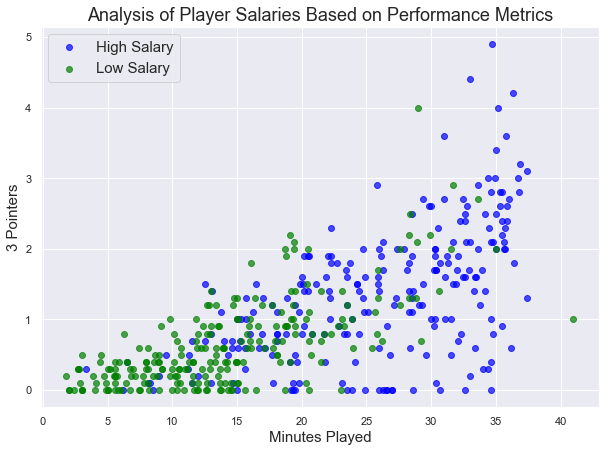

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme()

df = pd.read_csv("salary.csv")

median_salary = df['Salary'].median()

# Add the new column 'high salary' based on the condition
df['high_salary'] = (df['Salary'] >= median_salary).astype(int)

# Separate the data into high and low salary groups
high_salary = df[df.high_salary == 1]
low_salary = df[df.high_salary == 0]

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter plot for high salary players
ax.scatter(high_salary.MP, 
           high_salary['3P'], 
           color="blue", 
           label="High Salary", 
           alpha=0.7)  # semi-transparent to better see overlaps

# Scatter plot for low salary players
ax.scatter(low_salary.MP, 
           low_salary['3P'], 
           color="green", 
           label="Low Salary", 
           alpha=0.7)  # semi-transparent to better see overlaps

# Setting labels and titles
ax.set_xlabel("Minutes Played", fontsize=15)
ax.set_ylabel("3 Pointers", fontsize=15)
ax.legend(fontsize=15, loc="upper left")
ax.set_title("Analysis of Player Salaries Based on Performance Metrics", fontsize=18)

# Display the plot
plt.show()

As we can see in the above plot, players with a low salary have less 3 pointers made and minutes played than players with higher salaries, as expected. 

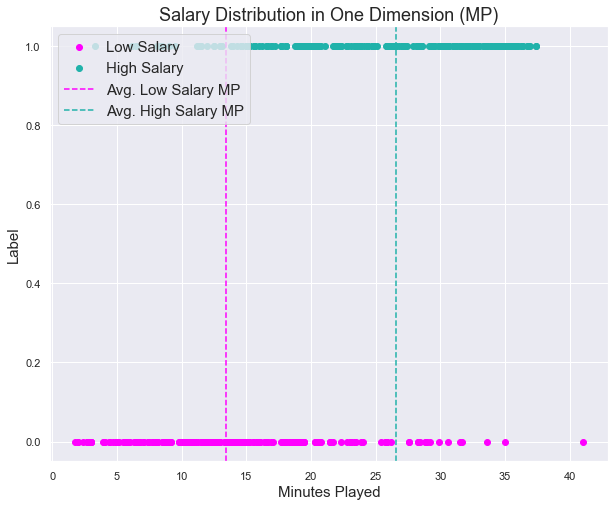

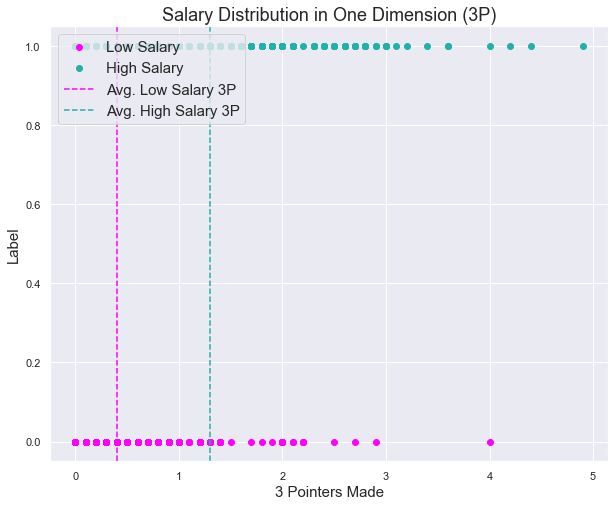

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate averages for minutes played
avg_mp_low = low_salary['MP'].median()
avg_mp_high = high_salary['MP'].median()

plt.figure(figsize=(10, 8))

# Scatter plot for low salary players
plt.scatter(low_salary['MP'], 
            np.zeros(len(low_salary)),  # Adjust the length to match low_salary data
            color="magenta", 
            label="Low Salary")

# Scatter plot for high salary players
plt.scatter(high_salary['MP'], 
            np.ones(len(high_salary)),  # Adjust the length to match high_salary data
            color="lightseagreen", 
            label="High Salary")

# Add vertical lines for average minutes played
plt.axvline(x=avg_mp_low, color='magenta', linestyle='--', label='Avg. Low Salary MP')
plt.axvline(x=avg_mp_high, color='lightseagreen', linestyle='--', label='Avg. High Salary MP')

plt.xlabel("Minutes Played", fontsize=15)
plt.ylabel("Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("Salary Distribution in One Dimension (MP)", fontsize=18)
plt.show()

# Calculate averages for 3 pointers
avg_3p_low = low_salary['3P'].median()
avg_3p_high = high_salary['3P'].median()

plt.figure(figsize=(10, 8))

# Scatter plot for low salary players
plt.scatter(low_salary['3P'], 
            np.zeros(len(low_salary)),  # Adjust the length to match low_salary data
            color="magenta", 
            label="Low Salary")

# Scatter plot for high salary players
plt.scatter(high_salary['3P'], 
            np.ones(len(high_salary)),  # Adjust the length to match high_salary data
            color="lightseagreen", 
            label="High Salary")

# Add vertical lines for average 3 pointers made
plt.axvline(x=avg_3p_low, color='magenta', linestyle='--', label='Avg. Low Salary 3P')
plt.axvline(x=avg_3p_high, color='lightseagreen', linestyle='--', label='Avg. High Salary 3P')

plt.xlabel("3 Pointers Made", fontsize=15)
plt.ylabel("Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("Salary Distribution in One Dimension (3P)", fontsize=18)
plt.show()


As we can see in the above plot, our data is not linearly separable for both 3 pointers made and minutes played, meaning that several players have higher minutes played and more 3 pointers made yet still will have a lower salary than players that play less minutes and make less 3 pointers than them. However, on average, players with a low salary will have a less 3 pointers made and minutes played than players with a higher salary.

Now let's use our Single Neuron object to train a logistic regression model

In [8]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

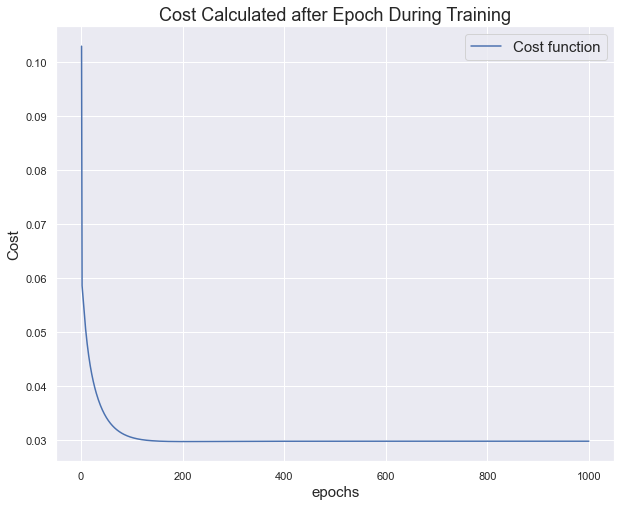

In [10]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df["MP"].values
X = X.reshape(-1, 1)
y = df['high_salary'].values

node.train(X, y, alpha = 0.01, epochs = 1000)

node.plot_cost_function()
plt.show()

This is good! As we can see, as the number of epochs increase and our weights and bias are more finely tuned, our cost function decreases, but is not zero, signifying that there will always be some element of randomness when trying to predict whether a player has a high salary or low salary based on the their 3 Pointers Made and their Minutes Played. 

Text(0.5, 1.0, 'Logistic Regression on Salary Classification (Minutes Played)')

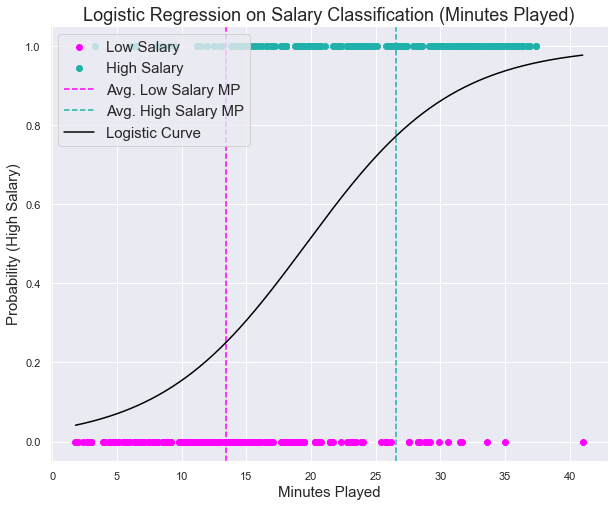

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load your dataset (or use the already loaded df with high_salary computed)
df = pd.read_csv('salary.csv')  # Assuming the file is correctly set
df['high_salary'] = (df['Salary'] >= df['Salary'].median()).astype(int)

# Prepare data
X = df['MP'].values.reshape(-1, 1)  # Minutes Played as feature
y = df['high_salary'].values        # High/Low salary as target

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Calculate medians for minutes played
avg_mp_low = df[df['high_salary'] == 0]['MP'].median()
avg_mp_high = df[df['high_salary'] == 1]['MP'].median()

# Set up the plot
plt.figure(figsize=(10, 8))

# Scatter plot for low and high salary players
plt.scatter(df[df['high_salary'] == 0]['MP'], np.zeros(len(df[df['high_salary'] == 0])), color="magenta", label="Low Salary")
plt.scatter(df[df['high_salary'] == 1]['MP'], np.ones(len(df[df['high_salary'] == 1])), color="lightseagreen", label="High Salary")

# Add vertical lines for average minutes played
plt.axvline(x=avg_mp_low, color='magenta', linestyle='--', label='Avg. Low Salary MP')
plt.axvline(x=avg_mp_high, color='lightseagreen', linestyle='--', label='Avg. High Salary MP')

# Create domain for logistic curve plotting
domain = np.linspace(df['MP'].min(), df['MP'].max(), 300)
logistic_predictions = model.predict_proba(domain.reshape(-1, 1))[:, 1]  # Probability estimates for class 1

# Plot logistic regression curve
plt.plot(domain, logistic_predictions, color='black', label='Logistic Curve')

# Set labels and title
plt.xlabel("Minutes Played", fontsize=15)
plt.ylabel("Probability (High Salary)", fontsize=15)  # Updated ylabel to reflect probability
plt.legend(fontsize=15, loc="upper left")
plt.title("Logistic Regression on Salary Classification (Minutes Played)", fontsize=18)

As we can see, our logistic regression line for minutes played is never strictly 0 or 1, meaning that there is never a level of certainty that a player is high salary or low salary player based on the number of minutes that they play. However, as a player plays more minutes, we *expect* them to have a higher salary, but not with 100% certainty. 

In [12]:
node.predict(X)
np.rint(node.predict(X)) != y
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.5010706638115632


As we can see, our logistic regression model predicts whether a player has a high or low salary based on their number of minutes played and 3 pointers made with around 50% accuracy, which certainly isn't ideal but is significantly better than our Single Perceptron Model. 